<a href="https://colab.research.google.com/github/saquib9790/proj2_hci/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Dataset Download (official Hugging Face source) ---
from huggingface_hub import snapshot_download

# This will automatically download the dataset repo into a local folder
dataset_dir = snapshot_download(
    repo_id="YCAI3/HCI_P2",      # official dataset name
    repo_type="dataset",         # specifies this is a dataset, not a model
    local_dir="./HCI_Dataset",   # folder where it will be stored
    ignore_patterns=[".gitattributes"]  # optional cleanup
)

print("Dataset downloaded to:", dataset_dir)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/971 [00:00<?, ?B/s]

HCI_Dataset.zip:   0%|          | 0.00/1.29G [00:00<?, ?B/s]

Dataset downloaded to: /content/HCI_Dataset


In [2]:
train_path = "./HCI_Dataset/train"
valid_path = "./HCI_Dataset/valid"
test_path  = "./HCI_Dataset/test"


In [3]:
import zipfile
import os

zip_path = os.path.join(dataset_dir, "HCI_Dataset.zip")
extract_dir = os.path.join(dataset_dir, "unzipped")

# Extract the dataset
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted to:", extract_dir)
print("Subfolders:", os.listdir(extract_dir))

✅ Dataset extracted to: /content/HCI_Dataset/unzipped
Subfolders: ['__MACOSX', 'HCI_Dataset']


In [15]:
base_path = "./HCI_Dataset/unzipped/HCI_Dataset"


In [17]:
from glob import glob
import os

image_paths = glob(os.path.join(base_path, "**", "*.jpg"), recursive=True)
print("Total images found:", len(image_paths))
print("Example paths:", image_paths[:5])



Total images found: 609656
Example paths: ['./HCI_Dataset/unzipped/HCI_Dataset/165/6/142_PYGMIES_61537.jpg', './HCI_Dataset/unzipped/HCI_Dataset/165/6/461_pronged_60558.jpg', './HCI_Dataset/unzipped/HCI_Dataset/165/6/223_ISHIM_40922.jpg', './HCI_Dataset/unzipped/HCI_Dataset/165/6/330_ordered_53665.jpg', './HCI_Dataset/unzipped/HCI_Dataset/165/6/94_COZINESS_17704.jpg']


In [18]:
def get_label_from_path(path):
    filename = os.path.basename(path)
    label = filename.split("_")[0]
    return label

labels = [get_label_from_path(p) for p in image_paths]
print("Sample labels:", labels[:10])


Sample labels: ['142', '461', '223', '330', '94', '275', '496', '424', '146', '426']


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_HEIGHT, IMG_WIDTH = 64, 64

def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=1)  # grayscale
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    return img


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


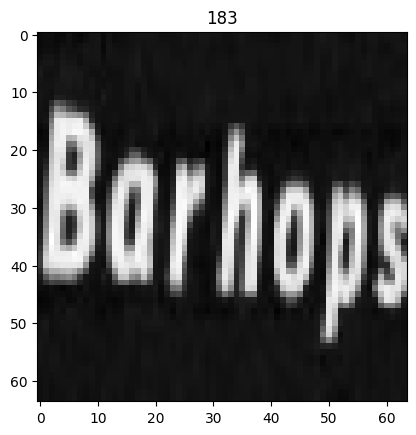

In [78]:
import random

sample_idx = random.randint(0, len(image_paths) - 1)
img = load_and_preprocess_image(image_paths[sample_idx])
plt.imshow(tf.squeeze(img), cmap='gray')
plt.title(get_label_from_path(image_paths[sample_idx]))
plt.show()


In [76]:
# Print the sample path, label, and confirm it exists
print("Sample path:", image_paths[sample_idx])
print("Extracted label:", get_label_from_path(image_paths[sample_idx]))
print("File exists:", os.path.exists(image_paths[sample_idx]))

Sample path: ./HCI_Dataset/unzipped/HCI_Dataset/60/4/346_Sweetest_76763.jpg
Extracted label: 346
File exists: True


In [81]:
import os
import pandas as pd
from collections import Counter

# Assuming your image_paths list already exists
def get_label_from_path(path):
    filename = os.path.basename(path)
    parts = filename.split("_")
    if len(parts) >= 3:
        return parts[1]  # The word between underscores
    return None

data = pd.DataFrame({
    "path": image_paths,
    "label": [get_label_from_path(p) for p in image_paths]
})

# Sanity check
print(data.sample(5))


                                                     path         label
479669  ./HCI_Dataset/unzipped/HCI_Dataset/200/6/398_r...       rebuffs
558028  ./HCI_Dataset/unzipped/HCI_Dataset/125/6/391_U...      UNCHAINS
378843  ./HCI_Dataset/unzipped/HCI_Dataset/79/7/132_co...     connivers
557472  ./HCI_Dataset/unzipped/HCI_Dataset/5/4/278_nut...     nutritive
477040  ./HCI_Dataset/unzipped/HCI_Dataset/133/2/26_ar...  artificially


In [82]:
# Flatten all characters across labels
all_text = "".join(data["label"].astype(str).tolist())

# Get unique sorted characters
unique_chars = sorted(list(set(all_text)))
print("Unique characters:", unique_chars)
print("Total unique chars:", len(unique_chars))


Unique characters: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Total unique chars: 62


In [84]:
from tensorflow.keras.layers import StringLookup

# Create lookup layers
char_to_num = StringLookup(vocabulary=unique_chars, oov_token="")
num_to_char = StringLookup(vocabulary=char_to_num.get_vocabulary(), invert=True)

# Test the encoding and decoding
example = "Sweetest"
encoded = char_to_num(tf.strings.unicode_split(example, input_encoding="UTF-8"))
decoded = tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

print("Original:", example)
print("Encoded:", encoded.numpy())
print("Decoded:", decoded)


Original: Sweetest
Encoded: [29 59 41 41 56 41 55 56]
Decoded: Rvddsdrs


In [85]:
IMG_HEIGHT, IMG_WIDTH = 64, 256  # Wider, since text is sequential
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    return img


In [86]:
def encode_label(label):
    # Split word into characters, map each to its numeric ID
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    label = char_to_num(label)
    return label


In [87]:
paths = data["path"].tolist()
labels = data["label"].tolist()

dataset = tf.data.Dataset.from_tensor_slices((paths, labels))

def process_data(path, label):
    image = load_and_preprocess_image(path)
    label = encode_label(label)
    return {"image": image, "label": label}

dataset = dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)


In [96]:
total_size = len(data)
train_size = int(0.8 * total_size)
val_size   = int(0.1 * total_size)

train_ds = dataset.take(train_size)
val_ds   = dataset.skip(train_size).take(val_size)
test_ds  = dataset.skip(train_size + val_size)


In [97]:
BATCH_SIZE = 64

def pad_batch(batch):
    images = batch["image"]
    labels = batch["label"]
    labels = tf.keras.preprocessing.sequence.pad_sequences(
        labels, padding='post'
    )
    return images, labels

train_ds = (
    train_ds.padded_batch(BATCH_SIZE, padded_shapes={"image": [64, 256, 1], "label": [None]})
    .prefetch(tf.data.AUTOTUNE)
)
val_ds = (
    val_ds.padded_batch(BATCH_SIZE, padded_shapes={"image": [64, 256, 1], "label": [None]})
    .prefetch(tf.data.AUTOTUNE)
)


In [100]:
for batch in train_ds.take(1):
    images = batch["image"]
    labels = batch["label"]



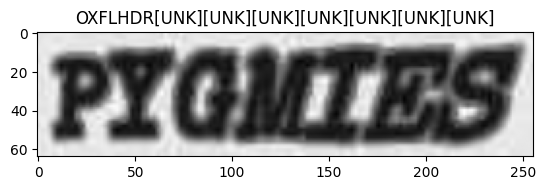

In [101]:
plt.imshow(tf.squeeze(tf.cast(images[0], tf.float32)), cmap='gray')

decoded = tf.strings.reduce_join(num_to_char(labels[0])).numpy().decode('utf-8')
plt.title(decoded)
plt.show()


In [102]:
print("Image dtype:", images.dtype)
print("Image shape:", images.shape)
print("Label dtype:", labels.dtype)
print("Label example:", labels[0])


Image dtype: <dtype: 'float32'>
Image shape: (64, 64, 256, 1)
Label dtype: <dtype: 'int64'>
Label example: tf.Tensor([26 35 17 23 19 15 29  0  0  0  0  0  0  0], shape=(14,), dtype=int64)
